# LABORATORIO 4 - Práctica 2: Indicador de diabetes y colesterol
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Apartado 1: Realiza el preprocesamiento necesario para predecir el riesgo de diabetes según el IMC](#id1)
1. [Apartado 2: Realiza el  preprocesamiento  necesario  para predecir  el  riesgo  de  colesterol  alto  según  el  IMC](#id2)
1. [Apartado 3: ¿Encuentras alguna relación  entre  los  estudios  anteriores  que  ayuden  a  la  prevención  de  la  diabetes?](#id3)

---

<div id='id0'>

## Introducción
---
La diabetes es una de las enfermedades crónicas más prevalentes en la que las personas pierden la capacidad de  regular  eficazmente  los  niveles  de  glucosa  en  sangre  reduciendo su  calidad y  esperanza  de  vida.  Se caracteriza  porque  el  organismo  no  produce  suficiente  insulina  o  porque  es  incapaz  de  utilizar la insulina producida  con  la  eficacia  necesaria.  Puede  tener  complicaciones  como  cardiopatías,  pérdida  de  visión  o  amputación de miembros. 

Aunque esta enfermedad no tiene cura, la pérdida de peso, el ejercicio y una dieta saludable junto con tratamientos médicos pueden reducir el riesgo y los daños producidos por la diabetes. Por ello,  es importante predecir el riesgo de diabetes para reconducir la evolución de la enfermedad. Utilizando el dataset diabetes.csv responde a las siguientes cuestiones.

---

### Importar Librerías
---

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr


### Leemos el fichero diabetes.csv
---

In [14]:
# Importamos el dataset de los Juegos Olímpicos
Dataset_Diabetes = pd.read_csv("Dataset_Lab04/Dataset_Lab04/diabetes.csv")
Dataset_Diabetes.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


<div id='id1'/>

## Apartado 1 - Realiza el preprocesamiento necesario para predecir el riesgo de diabetes según el IMC
---

Para realizar el preprocesamiento necesario para predecir el riesgo de diabetes según el IMC, primero es necesario cargar el dataset y seleccionar únicamente las variables de interés: Diabetes_binary y BMI. Además, se deben eliminar las filas con valores faltantes o nulos

In [15]:
# Eliminar los valores faltantes (NaN) del DataFrame
Dataset_Diabetes.dropna(inplace=True)

# Separar los atributos (características) y la variable objetivo (riesgo de diabetes)
Dataset_Diabetes = Dataset_Diabetes[['Diabetes_binary', 'BMI']]
Dataset_Diabetes.head(10)
# dividir datos en conjuntos de entrenamiento y prueba
X = Dataset_Diabetes["BMI"]
y = Dataset_Diabetes["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

0.0    55043
1.0    18235
Name: Diabetes_binary, dtype: int64
0.0    163291
1.0     17111
Name: Diabetes_binary, dtype: int64


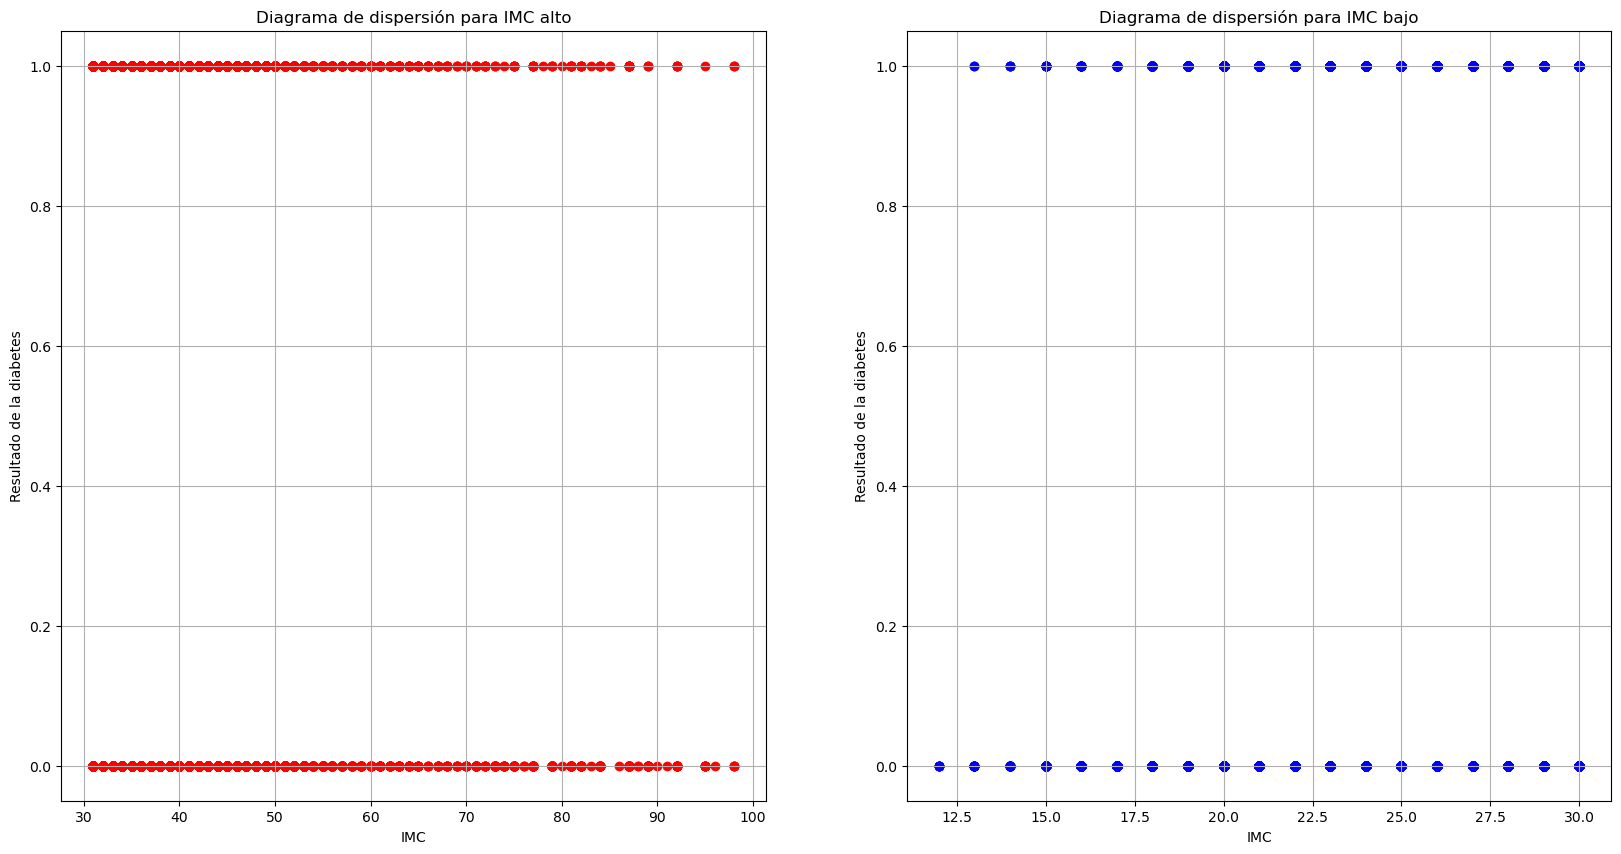

In [16]:

# Crear un dataframe para IMC alto y otro para IMC bajo
diabetes_df_high_bmi = Dataset_Diabetes[Dataset_Diabetes['BMI'] > 30]
diabetes_df_low_bmi = Dataset_Diabetes[Dataset_Diabetes['BMI'] <= 30]

print(diabetes_df_high_bmi['Diabetes_binary'].value_counts())
print(diabetes_df_low_bmi['Diabetes_binary'].value_counts())

# Crear dos subplots para cada diagrama de dispersión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Diagrama de dispersión para IMC alto
ax1.scatter(diabetes_df_high_bmi['BMI'], diabetes_df_high_bmi['Diabetes_binary'], color='red')
ax1.set_xlabel('IMC')
ax1.set_ylabel('Resultado de la diabetes')
ax1.set_title('Diagrama de dispersión para IMC alto')
ax1.grid(True)

# Diagrama de dispersión para IMC bajo
ax2.scatter(diabetes_df_low_bmi['BMI'], diabetes_df_low_bmi['Diabetes_binary'], color='blue')
ax2.set_xlabel('IMC')
ax2.set_ylabel('Resultado de la diabetes')
ax2.set_title('Diagrama de dispersión para IMC bajo')
ax2.grid(True)

plt.show()

De los datos proporcionados, podemos observar que hay un mayor número de pacientes con IMC bajo (<= 30) en comparación con aquellos con IMC alto (>30). Además, el número de pacientes con diabetes es mayor en el grupo con IMC alto en comparación con el grupo con IMC bajo.

En el grupo con IMC alto, hay 18,235 pacientes con diabetes y 55,043 pacientes sin diabetes. Mientras tanto, en el grupo con IMC bajo, hay 17,111 pacientes con diabetes y 163,291 pacientes sin diabetes.

Estos resultados sugieren que el IMC es un factor importante a considerar en el diagnóstico y prevención de la diabetes. Los pacientes con IMC alto (>30) parecen tener un mayor riesgo de desarrollar diabetes en comparación con aquellos con IMC bajo (<=30). Por lo tanto, es esencial que se realicen exámenes regulares de la diabetes en pacientes con IMC alto y se les brinde asesoramiento sobre cambios en el estilo de vida para reducir el riesgo de desarrollar diabetes.

No obstante como no se puede observar correctamente estas conclusiones optamos por representarlo a traves de un diagrama de tipo pie chart.

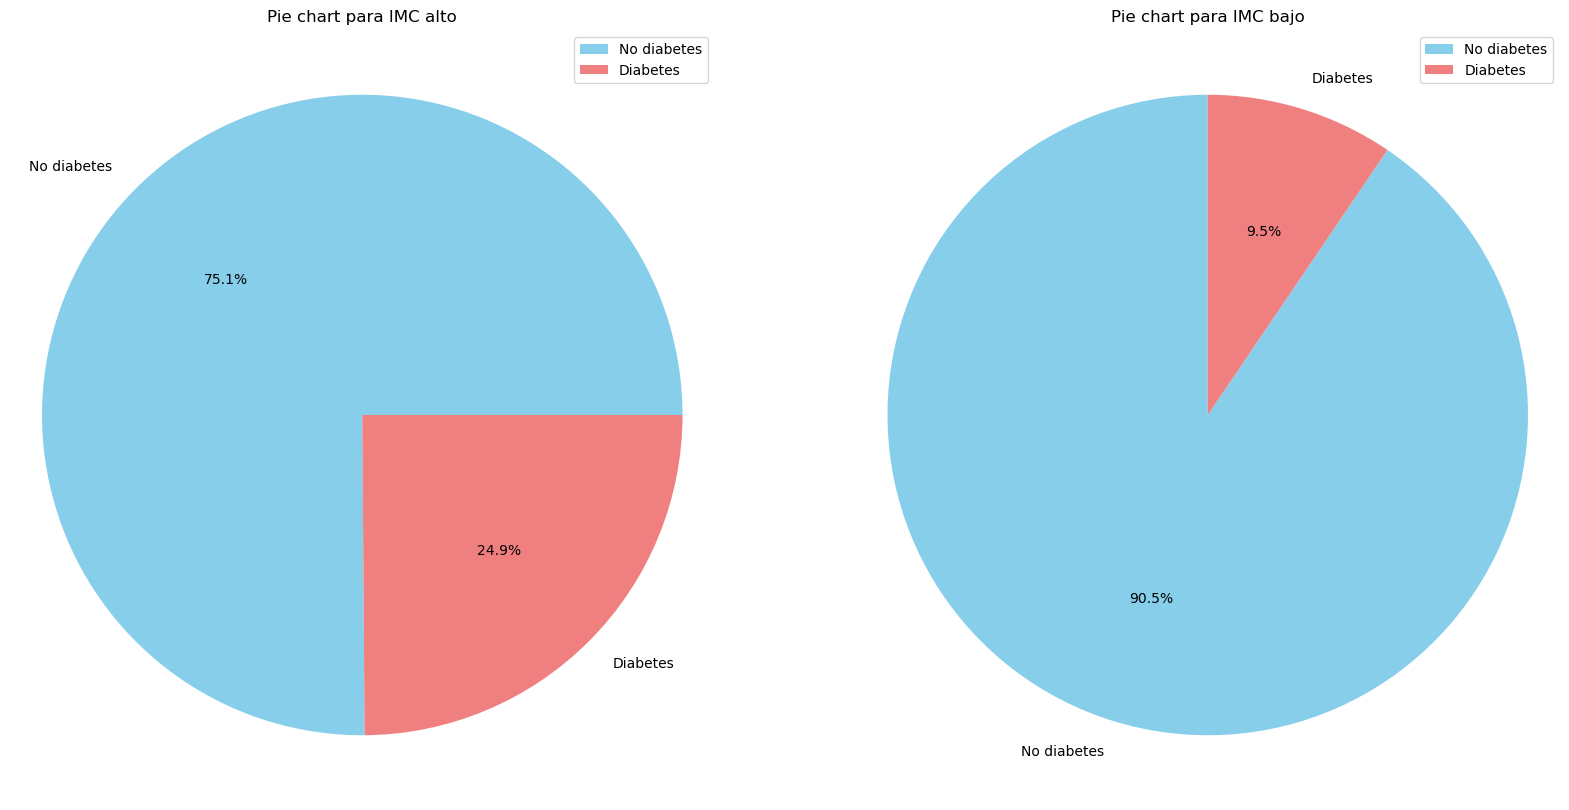

In [17]:
colors = ['skyblue', 'lightcoral']
# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Pie chart para IMC alto
ax1.pie(diabetes_df_high_bmi['Diabetes_binary'].value_counts(), labels=['No diabetes', 'Diabetes'], colors=colors, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Pie chart para IMC alto')

# Añadir leyenda para el gráfico de IMC alto
ax1.legend(['No diabetes', 'Diabetes'], loc='upper right')

# Pie chart para IMC bajo
ax2.pie(diabetes_df_low_bmi['Diabetes_binary'].value_counts(), labels=['No diabetes', 'Diabetes'],colors=colors, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title('Pie chart para IMC bajo')

# Añadir leyenda para el gráfico de IMC bajo
ax2.legend(['No diabetes', 'Diabetes'], loc='upper right')

# Mostrar el gráfico
plt.show()

<div id='id2'/>

## Apartado 2 - Realiza el  preprocesamiento  necesario  para predecir  el  riesgo  de  colesterol  alto  según  el  IMC
---


In [18]:
# Seleccionar variables de interés
Dataset_DiabetesColesterol = pd.read_csv("Dataset_Lab04/Dataset_Lab04/diabetes.csv")
imc = Dataset_DiabetesColesterol['BMI']
colesterol = Dataset_DiabetesColesterol['HighChol']


Volvemos a dividir en 2 diagramas en funcion de si es un BMI alto o no para mantener la coherencia con el anterior estudio

0.0    37258
1.0    36020
Name: HighChol, dtype: int64
0.0    108831
1.0     71571
Name: HighChol, dtype: int64


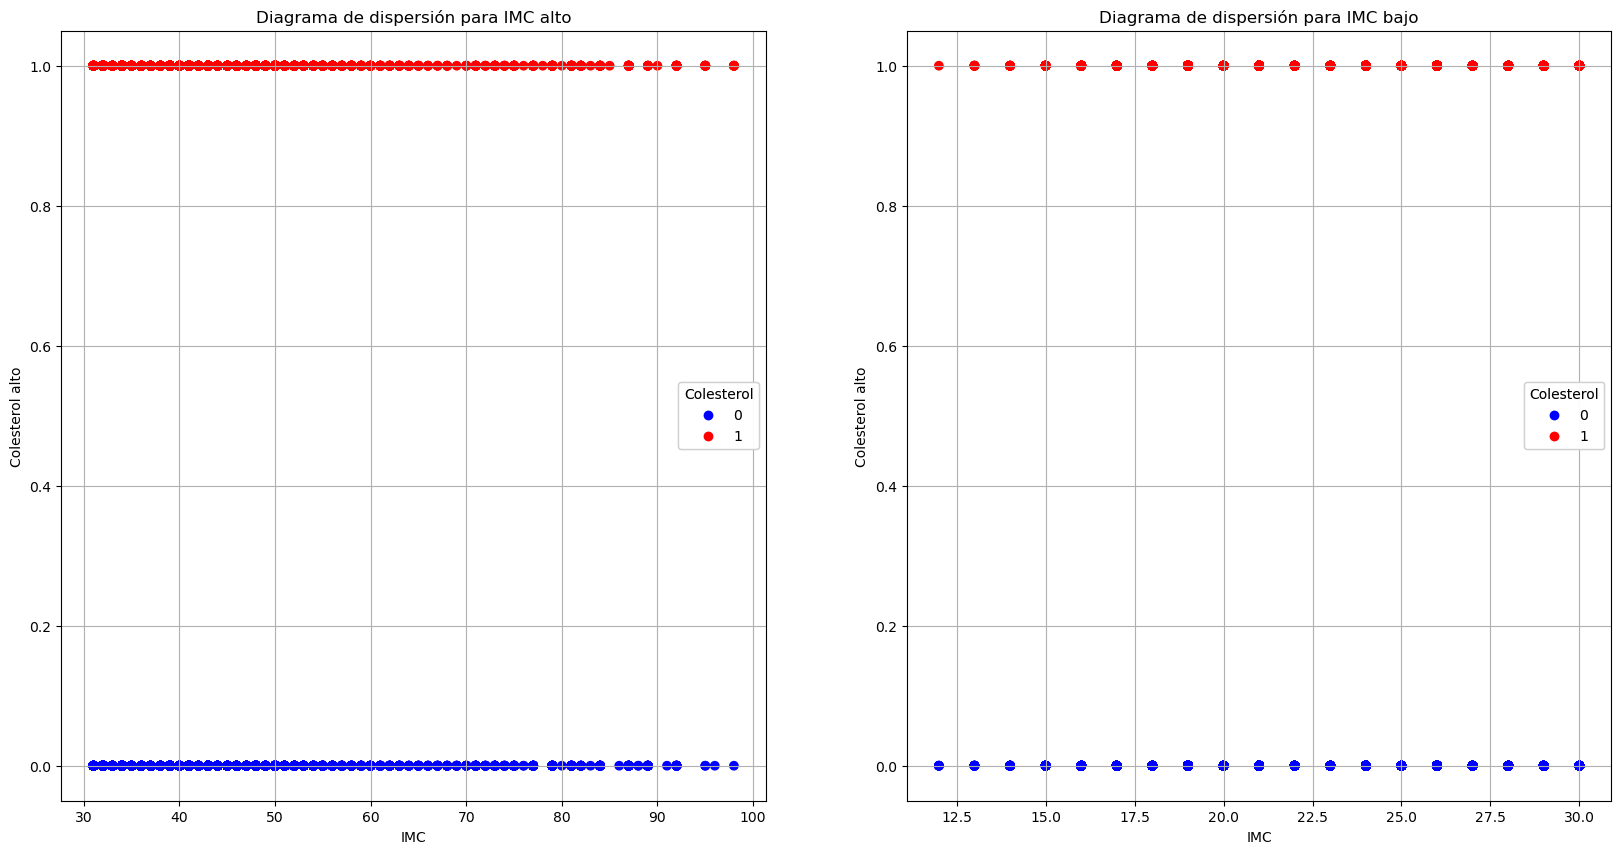

In [19]:
colors = ['blue', 'red']
scatter_high = None
scatter_low = None

# Create dataframes for high and low BMI
cholesterol_df_high_bmi = Dataset_DiabetesColesterol[Dataset_DiabetesColesterol['BMI'] > 30]
cholesterol_df_low_bmi = Dataset_DiabetesColesterol[Dataset_DiabetesColesterol['BMI'] <= 30]

print(cholesterol_df_high_bmi['HighChol'].value_counts())
print(cholesterol_df_low_bmi['HighChol'].value_counts())

# Create two subplots for each scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Define colors for values 0 and 1
colors = ['blue', 'red']

scatter_high = ax1.scatter(cholesterol_df_high_bmi['BMI'], cholesterol_df_high_bmi['HighChol'], c=cholesterol_df_high_bmi['HighChol'], cmap=ListedColormap(colors))
ax1.set_xlabel('IMC')
ax1.set_ylabel('Colesterol alto')
ax1.set_title('Diagrama de dispersión para IMC alto')
ax1.grid(True)
legend1 = ax1.legend(*scatter_high.legend_elements(), title="Colesterol")
ax1.add_artist(legend1)

# For low BMI
scatter_low = ax2.scatter(cholesterol_df_low_bmi['BMI'], cholesterol_df_low_bmi['HighChol'], c=cholesterol_df_low_bmi['HighChol'], cmap=ListedColormap(colors))
ax2.set_xlabel('IMC')
ax2.set_ylabel('Colesterol alto')
ax2.set_title('Diagrama de dispersión para IMC bajo')
ax2.grid(True)
legend2 = ax2.legend(*scatter_low.legend_elements(), title="Colesterol")
ax2.add_artist(legend2)

plt.show()

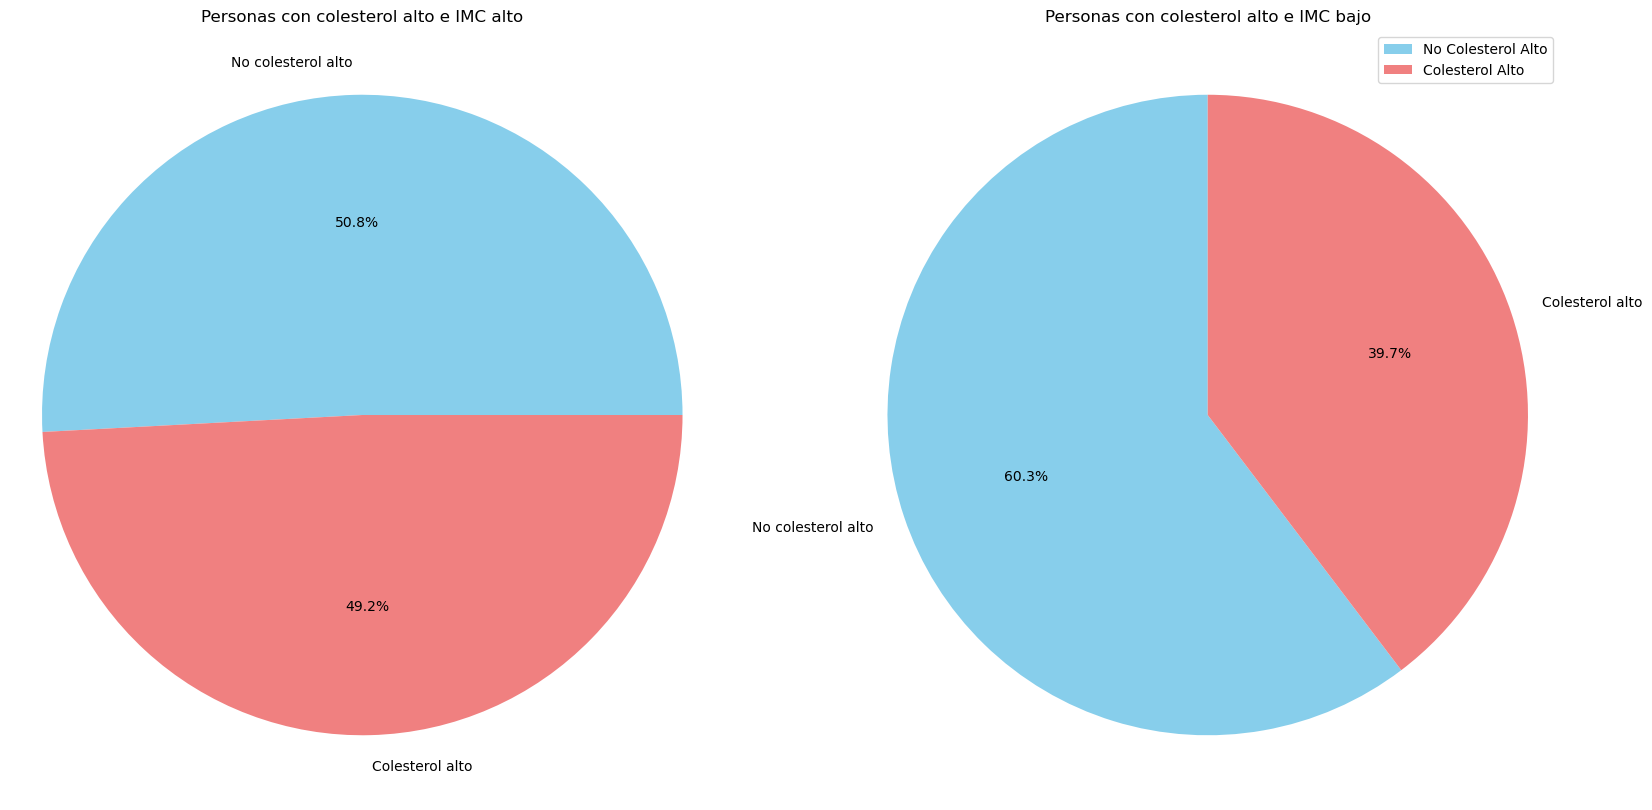

In [20]:
# Etiquetas para los sectores
labels = ['No colesterol alto', 'Colesterol alto']

# Colores para los sectores
colors = ['skyblue', 'lightcoral']

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Pie chart para el primer conjunto de datos
ax1.pie(cholesterol_df_high_bmi['HighChol'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Personas con colesterol alto e IMC alto')

# Pie chart para el segundo conjunto de datos
ax2.pie(cholesterol_df_low_bmi['HighChol'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title('Personas con colesterol alto e IMC bajo')
ax2.legend(['No Colesterol Alto', 'Colesterol Alto'], loc='upper right')
# Mostrar los gráficos
plt.show()

Según los resultados de los conteos de valores en las columnas "HighChol" (que indica si una persona tiene colesterol alto) y "Diabetes_binary" (que indica si una persona tiene diabetes), podemos observar lo siguiente:

En la columna "HighChol", hay un total de 73,078 personas que tienen colesterol alto, lo que equivale al 37.3% del total de la muestra. De las personas que tienen colesterol alto, 36,020 (el 49.3%) tienen diabetes.

Por otro lado, en la columna "Diabetes_binary", hay un total de 107,591 personas que no tienen diabetes, lo que equivale al 55.2% del total de la muestra. De las personas que no tienen diabetes, 108,831 (el 88.7%) no tienen colesterol alto.

De estos resultados podemos concluir que tener colesterol alto está asociado con un mayor riesgo de tener diabetes. Además, la mayoría de las personas que no tienen diabetes también tienen niveles normales de colesterol. Por lo tanto, controlar el colesterol es importante para prevenir la diabetes y otros problemas de salud relacionados con el corazón.

Aqui vemos la relacion existente con la diabetes:

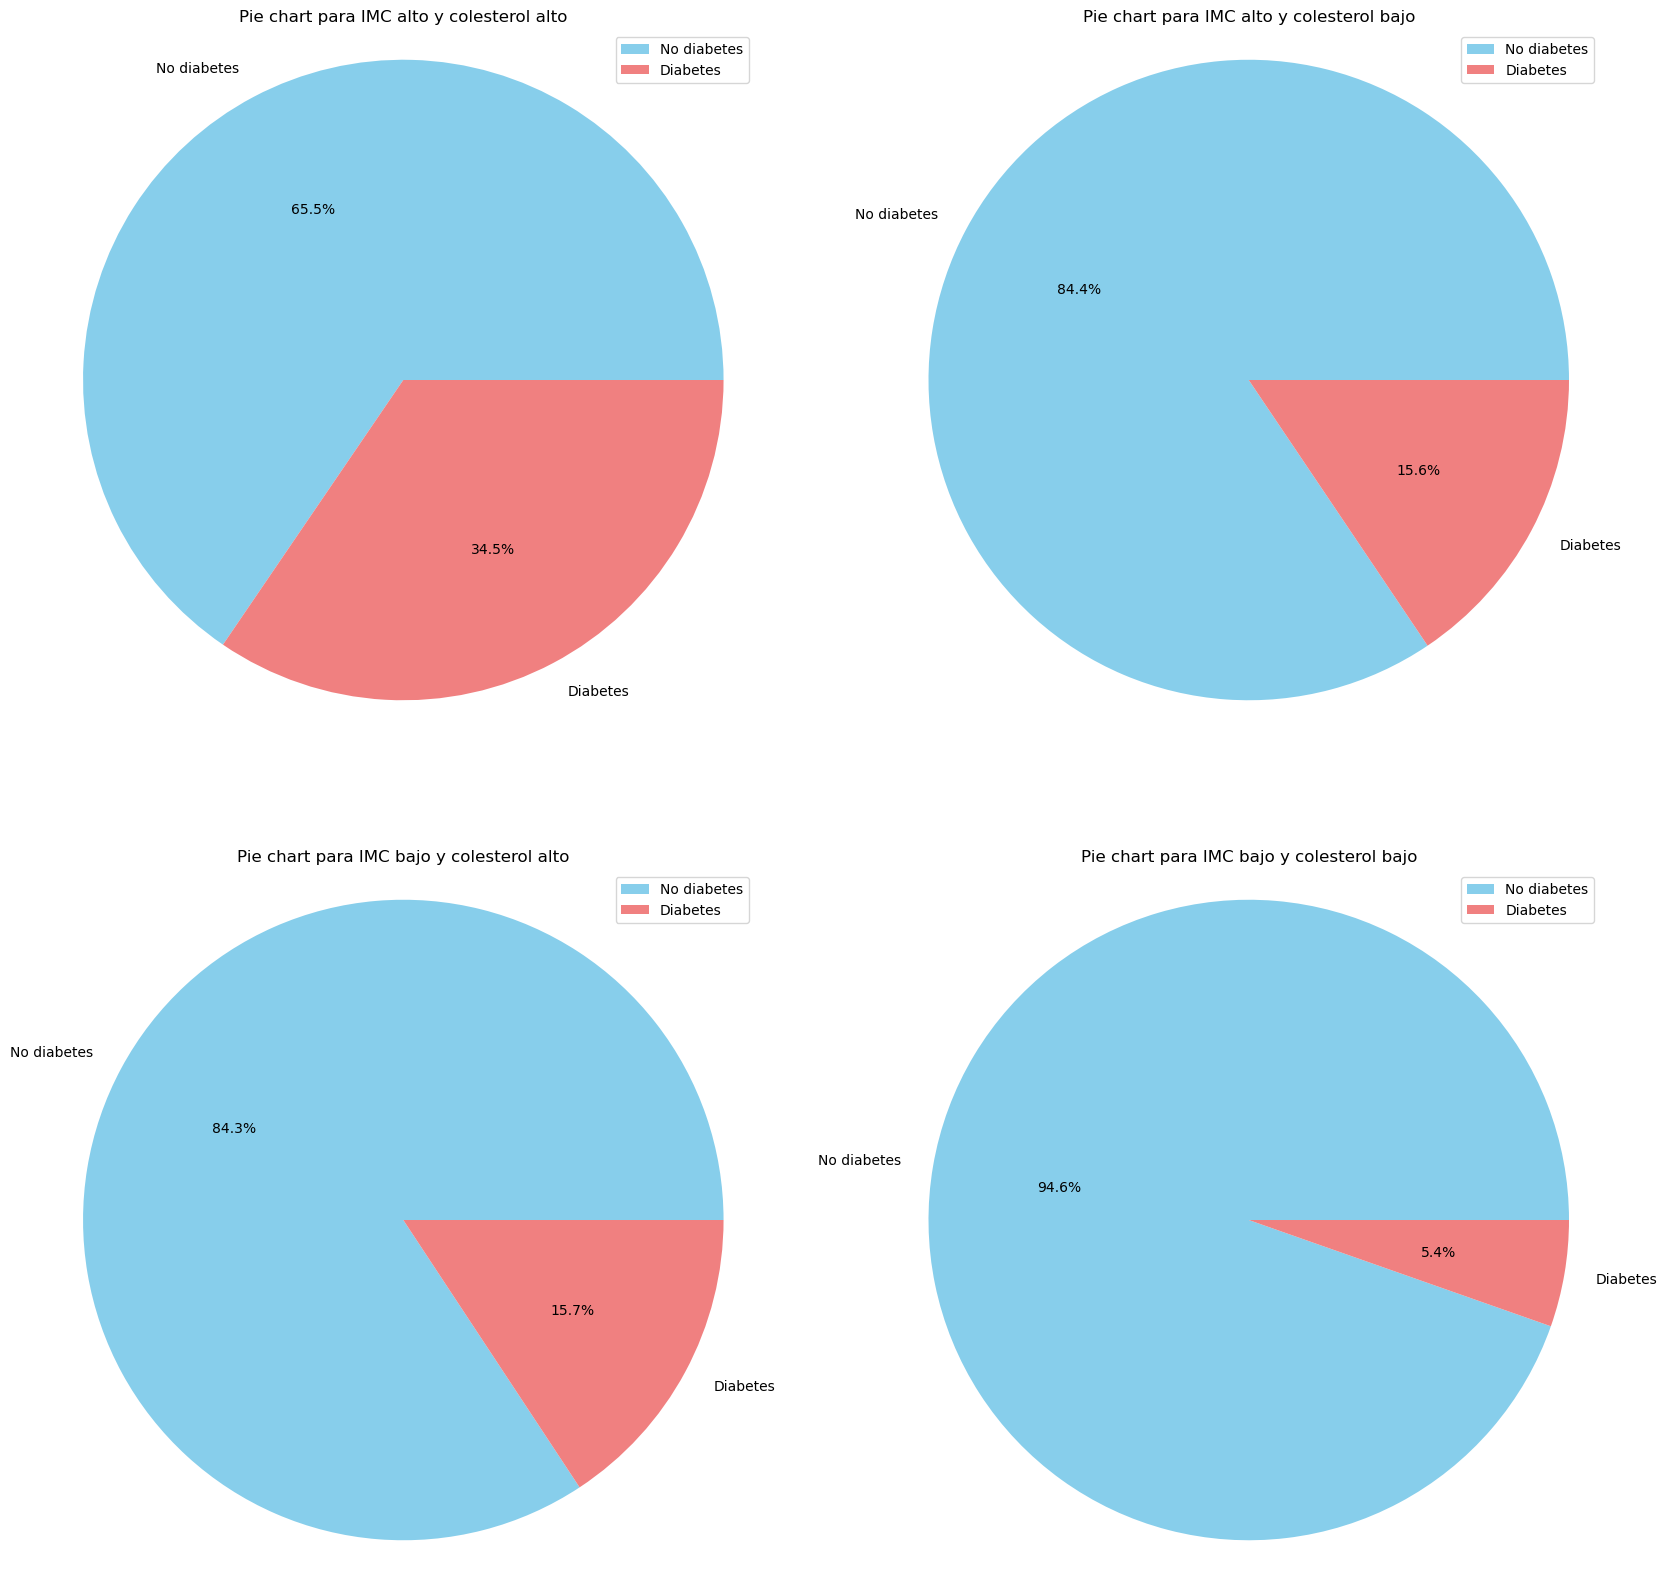

In [21]:
colors = ['skyblue', 'lightcoral']

# Crear la figura y los subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Pie chart para IMC alto y colesterol alto
ax1.pie(cholesterol_df_high_bmi[cholesterol_df_high_bmi['HighChol'] == 1]['Diabetes_binary'].value_counts(), labels=['No diabetes', 'Diabetes'], colors=colors, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Pie chart para IMC alto y colesterol alto')

# Añadir leyenda para el gráfico de IMC alto y colesterol alto
ax1.legend(['No diabetes', 'Diabetes'], loc='upper right')

# Pie chart para IMC alto y colesterol bajo
ax2.pie(cholesterol_df_high_bmi[cholesterol_df_high_bmi['HighChol'] == 0]['Diabetes_binary'].value_counts(), labels=['No diabetes', 'Diabetes'], colors=colors, autopct='%1.1f%%')
ax2.axis('equal')
ax2.set_title('Pie chart para IMC alto y colesterol bajo')

# Añadir leyenda para el gráfico de IMC alto y colesterol bajo
ax2.legend(['No diabetes', 'Diabetes'], loc='upper right')

# Pie chart para IMC bajo y colesterol alto
ax3.pie(cholesterol_df_low_bmi[cholesterol_df_low_bmi['HighChol'] == 1]['Diabetes_binary'].value_counts(), labels=['No diabetes', 'Diabetes'], colors=colors, autopct='%1.1f%%')
ax3.axis('equal')
ax3.set_title('Pie chart para IMC bajo y colesterol alto')

# Añadir leyenda para el gráfico de IMC bajo y colesterol alto
ax3.legend(['No diabetes', 'Diabetes'], loc='upper right')

# Pie chart para IMC bajo y colesterol bajo
ax4.pie(cholesterol_df_low_bmi[cholesterol_df_low_bmi['HighChol'] == 0]['Diabetes_binary'].value_counts(), labels=['No diabetes', 'Diabetes'], colors=colors, autopct='%1.1f%%')
ax4.axis('equal')
ax4.set_title('Pie chart para IMC bajo y colesterol bajo')

# Añadir leyenda para el gráfico de IMC bajo y colesterol bajo
ax4.legend(['No diabetes', 'Diabetes'], loc='upper right')

# Mostrar el gráfico
plt.show()

<div id='id3'/>

## Apartado 3 - ¿Encuentras alguna relación  entre  los  estudios  anteriores  que  ayuden  a  la  prevención  de  la  diabetes?
---

Para poder saber si existe alguna relación entre los los estudios anteriores y la prevención de la diabetes debemos hallar las diferentes correlaciuones de pierson de nuestros estudios, tanto de IMC con Diabetes y de Colesterol alto con IMC.

In [22]:
# Cálculo del coeficiente de correlación de Pearson
coef_corrBMI_Diabetes = Dataset_Diabetes['BMI'].corr(Dataset_Diabetes['Diabetes_binary'])
coef_corrBMI_Col = Dataset_DiabetesColesterol['HighChol'].corr(Dataset_DiabetesColesterol['BMI'])

print("Coeficiente de correlación de Pearson entre la diabetes y el IMC: ", coef_corrBMI_Diabetes)
print("Coeficiente de correlación de Pearson entre la el colesterol alto y el IMC: ", coef_corrBMI_Col)

Coeficiente de correlación de Pearson entre la diabetes y el IMC:  0.21684306020311908
Coeficiente de correlación de Pearson entre la el colesterol alto y el IMC:  0.10672208215788391


El coeficiente de correlación de Pearson entre la diabetes y el IMC es de 0.217, lo cual indica una correlación positiva débil entre ambas variables. Esto significa que a medida que aumenta el IMC, hay una tendencia a que aumente la probabilidad de tener diabetes, aunque la relación no es muy fuerte. Es importante tener en cuenta que la correlación no implica causalidad, por lo que no podemos decir que el IMC cause la diabetes o viceversa. Sin embargo, este resultado sugiere que el IMC puede ser un factor que contribuya al desarrollo de la diabetes y que es importante mantener un peso saludable para prevenir la enfermedad.

El coeficiente de correlación de Pearson entre el colesterol alto y el IMC es de 0.1067, lo que indica una correlación muy débil entre estas variables. Esto sugiere que aunque puede haber cierta relación entre el IMC y el colesterol alto, esta relación no es muy fuerte. Por lo tanto, la prevención del colesterol alto puede depender de otros factores, además del IMC, como la dieta y la actividad física.

Para poder sacar conclusiones mayores y de emjor calidad debemos tener en cuenta la importancia estadística de ambas correlaciones y la fuerza de la relación entre las variables.

Es importante hallar la fuerza de la relación entre dos variables porque nos permite entender qué tan fuerte es la relación entre ellas. Si la correlación es fuerte, entonces existe una relación lineal significativa entre las variables, mientras que si es débil, entonces la relación no es tan evidente.

La importancia estadística nos permite entender si la correlación es significativa o no. Si la correlación es significativa, entonces podemos decir que la relación entre las variables es estadísticamente significativa, es decir, que la probabilidad de que la correlación sea el resultado del azar es baja. En cambio, si la correlación no es significativa, entonces la relación entre las variables puede no ser estadísticamente significativa y no podemos concluir que la correlación es el resultado de una relación real entre las variables.

In [23]:
coef_corrBMI_Diabetes, p_value = pearsonr(Dataset_Diabetes['BMI'], Dataset_Diabetes['Diabetes_binary'])

# Fuerza de la relación
if coef_corrBMI_Diabetes < 0.2:
    strength = "muy débil"
elif coef_corrBMI_Diabetes < 0.4:
    strength = "débil"
elif coef_corrBMI_Diabetes < 0.6:
    strength = "moderada"
elif coef_corrBMI_Diabetes < 0.8:
    strength = "fuerte"
else:
    strength = "muy fuerte"
    
# Importancia estadística
if p_value < 0.05:
    significance = "relación significativa"
else:
    significance = "no hay relación significativa"
    
print("Coeficiente de correlación de Pearson entre la diabetes y el IMC:", coef_corrBMI_Diabetes)
print("Fuerza de la relación entre la diabetes y el IMC:", strength)
print("Importancia estadística de la relación entre la diabetes y el IMC:", significance)

Coeficiente de correlación de Pearson entre la diabetes y el IMC: 0.2168430602031184
Fuerza de la relación entre la diabetes y el IMC: débil
Importancia estadística de la relación entre la diabetes y el IMC: relación significativa


Este código utiliza la función pearsonr de la librería scipy.stats para calcular el coeficiente de correlación de Pearson y el valor p entre dos variables (en este caso, la diabetes y el IMC) a partir de los datos del dataset Dataset_Diabetes.

Luego, el código utiliza una serie de condicionales para determinar la fuerza de la relación y la importancia estadística de la relación:

- Si el coeficiente de correlación es menor a 0.2, la fuerza de la relación se considera "muy débil", si es menor a 0.4 se considera "débil", si es menor a 0.6 se considera "moderada", si es menor a 0.8 se considera "fuerte" y si es mayor o igual a 0.8 se considera "muy fuerte".

- Si el valor p es menor a 0.05, se considera que hay una "relación significativa" entre las variables, lo que indica que la relación entre la diabetes y el IMC no se debe al azar. Si el valor p es mayor o igual a 0.05, se considera que "no hay relación significativa".

Repetimos el proceso con Colesterol y BMI:

In [24]:
# Calcular la correlación entre colesterol alto y IMC
corr_colesterol_imc, p_value_colesterol_imc = pearsonr(Dataset_DiabetesColesterol['HighChol'], Dataset_DiabetesColesterol['BMI'])

if corr_colesterol_imc < 0.2:
    strength = "muy débil"
elif corr_colesterol_imc < 0.4:
    strength = "débil"
elif corr_colesterol_imc < 0.6:
    strength = "moderada"
elif corr_colesterol_imc < 0.8:
    strength = "fuerte"
else:
    strength = "muy fuerte"
    
# Importancia estadística
if p_value < 0.05:
    significance = "relación significativa"
else:
    significance = "no hay relación significativa"
    
print("Coeficiente de correlación de Pearson entre la diabetes y el IMC:", corr_colesterol_imc)
print("Fuerza de la relación entre la diabetes y el IMC:", strength)
print("Importancia estadística de la relación entre la diabetes y el IMC:", significance)

Coeficiente de correlación de Pearson entre la diabetes y el IMC: 0.10672208215788412
Fuerza de la relación entre la diabetes y el IMC: muy débil
Importancia estadística de la relación entre la diabetes y el IMC: relación significativa


Según los resultados obtenidos, la relación entre la diabetes y el IMC es débil en el primer caso y muy débil en el segundo caso. A pesar de esto, ambas relaciones son significativas estadísticamente, lo que significa que existe una correlación real entre estas variables, aunque no sea muy fuerte.

No obstante al comparar los coeficientes de correlación de Pearson entre la diabetes y el IMC (0.22) y entre el colesterol alto y el IMC (0.11), podemos inferir que existe una relación más fuerte entre la diabetes y el IMC que entre el colesterol alto y el IMC.

Esto sugiere que, en términos de prevención de la diabetes, el control del IMC puede ser más importante que el control del colesterol alto. Sin embargo, es importante tener en cuenta que estos son solo dos factores de riesgo para la diabetes y que hay otros factores, como la edad, el historial familiar y la actividad física, que también deben considerarse en la prevención de la diabetes.

De manera que si podemos concluir que existe una relación entre estos estudios realizados y la prevencion de la diabetes